In [1]:
#pip install factor_analyzer

In [2]:
# Import required packages
import sys
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from factor_analyzer import FactorAnalyzer

In [3]:
original = pd.read_csv('Starbucks satisfactory survey.csv')
original.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


# Step 1 Data Visualization
In this step, we can understand our data

In [4]:
#show the unqiue value of all the column
for col in original.drop('Timestamp',axis=1).columns:
    print(col)
    print(original[col].unique())
    print()

1. Your Gender
['Female' 'Male']

2. Your Age
['From 20 to 29' 'From 30 to 39' '40 and above' 'Below 20']

3. Are you currently....?
['Student' 'Employed' 'Self-employed' 'Housewife']

4. What is your annual income?
['Less than RM25,000' 'RM50,000 - RM100,000' 'RM25,000 - RM50,000'
 'RM100,000 - RM150,000' 'More than RM150,000']

5. How often do you visit Starbucks?
['Rarely' 'Monthly' 'Weekly' 'Never' 'Daily']

6. How do you usually enjoy Starbucks?
['Dine in' 'Take away' 'Drive-thru' 'never' 'Never buy' nan
 'I dont like coffee' 'Never' 'Never ']

7. How much time do you normally  spend during your visit?
['Between 30 minutes to 1 hour' 'Below 30 minutes' 'More than 3 hours'
 'Between 1 hour to 2 hours' 'Between 2 hours to 3 hours']

8. The nearest Starbucks's outlet to you is...?
['within 1km' '1km - 3km' 'more than 3km']

9. Do you have Starbucks membership card?
['Yes' 'No']

10. What do you most frequently purchase at Starbucks?
['Coffee' 'Cold drinks;Pastries' 'Coffee;Sandwiches

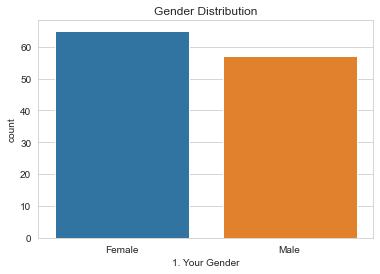

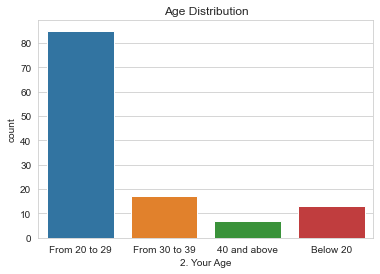

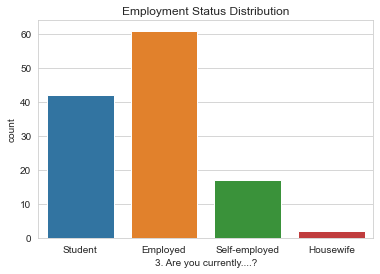

In [5]:
# Gender bar chart
sns.set_style('whitegrid')
sns.countplot(x='1. Your Gender', data=original)
plt.title('Gender Distribution')
plt.show()

#bar chart for age
sns.countplot(x='2. Your Age', data=original)
plt.title('Age Distribution')
plt.show()

#bar chart for Employment status
sns.countplot(x='3. Are you currently....?', data=original)
plt.title('Employment Status Distribution')
plt.show()

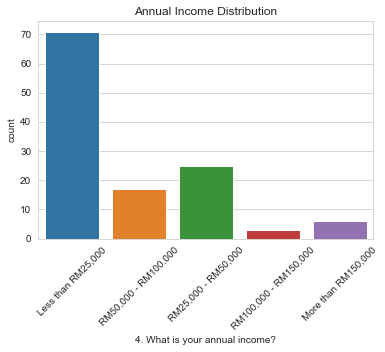

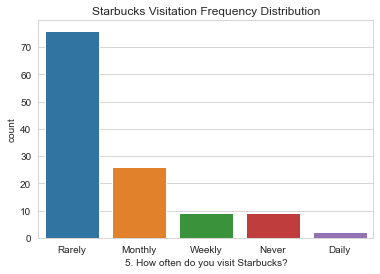

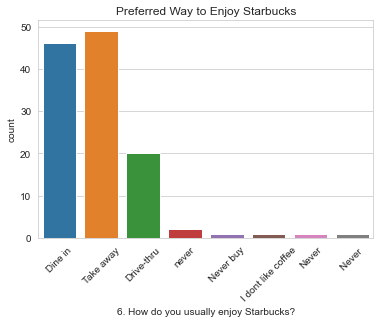

In [6]:
#Bar chart for Annual Income:
sns.countplot(x='4. What is your annual income?', data=original)
plt.xticks(rotation=45)
plt.title('Annual Income Distribution')
plt.show()

#Bar chart for Frequency of visiting Starbucks:
sns.countplot(x='5. How often do you visit Starbucks?', data=original)
plt.title('Starbucks Visitation Frequency Distribution')
plt.show()

#Bar chart for Preferred way to enjoy Starbucks:
sns.countplot(x='6. How do you usually enjoy Starbucks?', data=original)
plt.xticks(rotation=45)
plt.title('Preferred Way to Enjoy Starbucks')
plt.show()

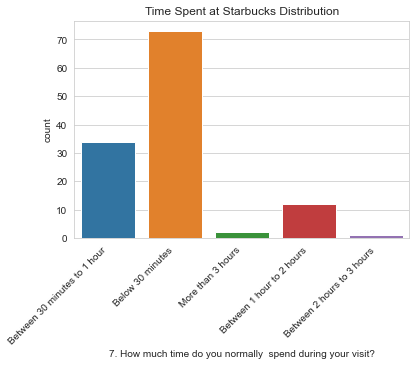

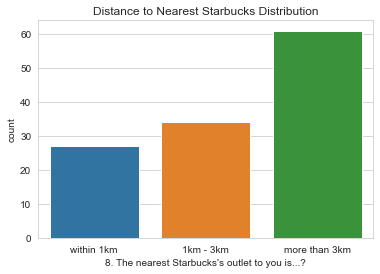

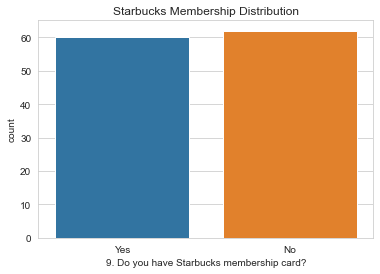

In [7]:
#Bar chart for Time Spent at Starbucks:
sns.countplot(x='7. How much time do you normally  spend during your visit?', data=original)
plt.title('Time Spent at Starbucks Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

#Bar chart for Distance to Nearest Starbucks:
sns.countplot(x="8. The nearest Starbucks's outlet to you is...?", data=original)
plt.title('Distance to Nearest Starbucks Distribution')
plt.show()

#Bar chart for Starbucks Membership
sns.countplot(x='9. Do you have Starbucks membership card?', data=original)
plt.title('Starbucks Membership Distribution')
plt.show()

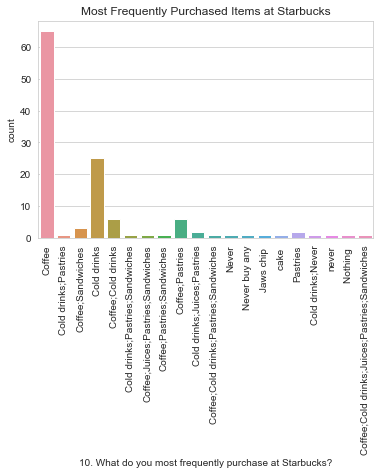

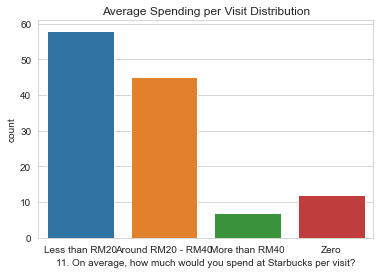

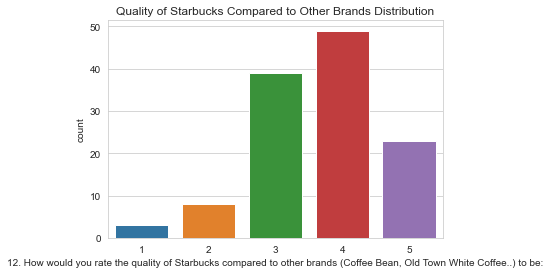

In [8]:
#Bar chart for Most Frequently Purchased Items at Starbucks:
sns.countplot(x='10. What do you most frequently purchase at Starbucks?', data=original)
plt.xticks(rotation=90)
plt.title('Most Frequently Purchased Items at Starbucks')
plt.show()

#Bar chart for Average Spending per Visit:
sns.countplot(x='11. On average, how much would you spend at Starbucks per visit?', data=original)
plt.title('Average Spending per Visit Distribution')
plt.show()

#Bar chart for Quality of Starbucks Compared to Other Brands
sns.countplot(x='12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:', data=original)
plt.title('Quality of Starbucks Compared to Other Brands Distribution')
plt.show()

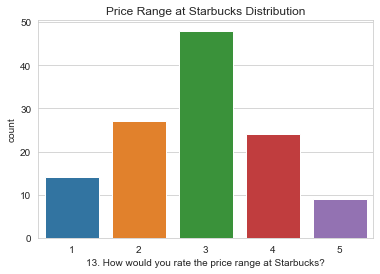

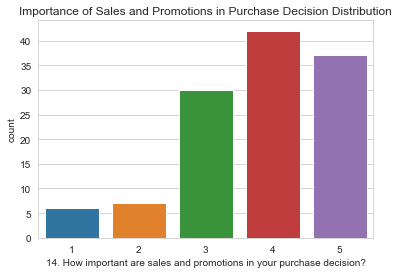

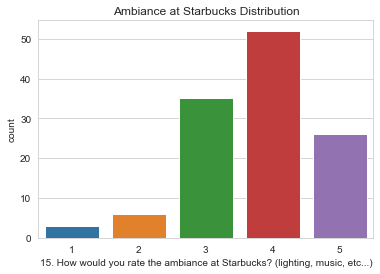

In [9]:
#Bar chart for Price Range at Starbucks:
sns.countplot(x='13. How would you rate the price range at Starbucks?', data=original)
plt.title('Price Range at Starbucks Distribution')
plt.show()

#Bar chart for Importance of Sales and Promotions in Purchase Decision
sns.countplot(x='14. How important are sales and promotions in your purchase decision?', data=original)
plt.title('Importance of Sales and Promotions in Purchase Decision Distribution')
plt.show()

#Bar chart for Ambiance at Starbucks
sns.countplot(x='15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)', data=original)
plt.title('Ambiance at Starbucks Distribution')
plt.show()


Text(0.5, 1.0, 'Will You Continue to Buy at Starbucks?')

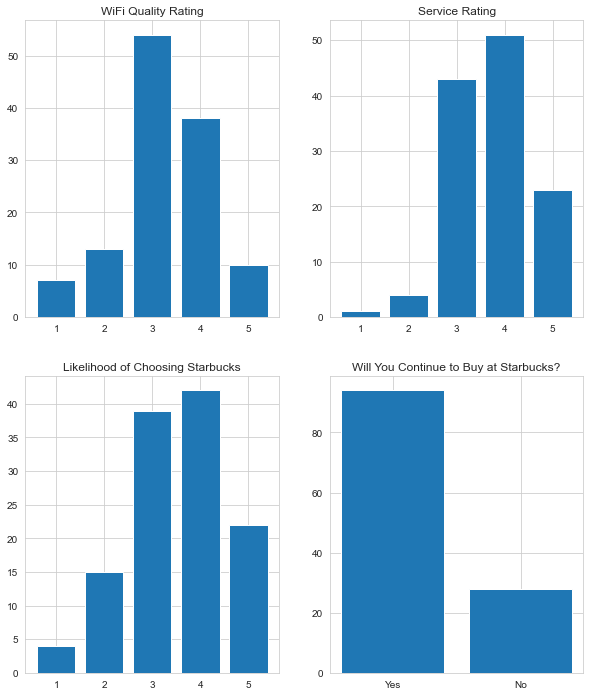

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 12))

# 16. You rate the WiFi quality at Starbucks as..
wifi_rating = original['16. You rate the WiFi quality at Starbucks as..'].value_counts()
axs[0, 0].bar(wifi_rating.index, wifi_rating.values)
axs[0, 0].set_title('WiFi Quality Rating')

# 17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)
service_rating = original['17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)'].value_counts()
axs[0, 1].bar(service_rating.index, service_rating.values)
axs[0, 1].set_title('Service Rating')

# 18. How likely you will choose Starbucks for doing business meetings or hangout with friends?
likelihood_rating = original['18. How likely you will choose Starbucks for doing business meetings or hangout with friends?'].value_counts()
axs[1, 0].bar(likelihood_rating.index, likelihood_rating.values)
axs[1, 0].set_title('Likelihood of Choosing Starbucks')

# 20. Will you continue buying at Starbucks?
will_continue = original['20. Will you continue buying at Starbucks?'].value_counts()
axs[1, 1].bar(will_continue.index, will_continue.values)
axs[1, 1].set_title('Will You Continue to Buy at Starbucks?')

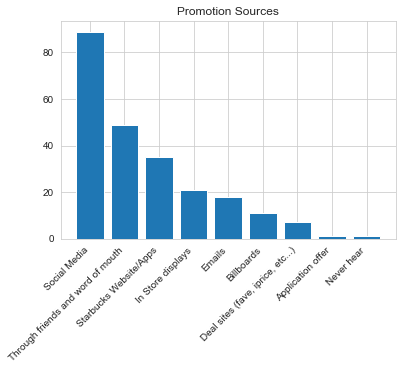

In [11]:
promo_sources = original['19. How do you come to hear of promotions at Starbucks? Check all that apply.'].str.get_dummies(';')
promo_count = promo_sources.sum().sort_values(ascending=False)
plt.bar(promo_count.index, promo_count.values)

# set the title
plt.title('Promotion Sources')

# adjust the x-axis labels
plt.xticks(rotation=45, ha='right')

# display the plot
plt.show()

# **Step 2 Data Validation**
In this step, we check the dataset, check if there are any missing value and take a look at the statistic value of the dataset

In [12]:
df = pd.read_csv('Starbucks satisfactory survey encode cleaned.csv')

In [13]:
# Check the dataset of the first 5 row
df.head()

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
0,1,1,1,0,0,3,0,1,0,0,...,3,1,1,1,1,1,1,1,1,0
1,2,1,1,0,0,3,2,0,1,0,...,2,1,1,1,1,1,1,1,1,0
2,3,0,1,2,0,2,0,1,2,0,...,3,1,1,1,1,1,1,1,1,0
3,4,1,1,0,0,3,2,0,2,1,...,3,1,1,1,1,1,1,1,1,1
4,5,0,1,0,0,2,2,1,1,1,...,3,1,1,1,1,1,1,1,1,0


In [14]:
# show the statistic data
df.describe()

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.000000,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.000000,113.000000
mean,60.150442,0.522124,1.185841,1.221239,0.761062,2.557522,1.070796,0.610619,1.274336,0.469027,...,3.539823,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.991150,0.203540
std,35.566392,0.501735,0.675445,0.932877,1.087874,0.718854,0.979402,0.849723,0.804538,0.501263,...,1.026744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094072,0.404424
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,29.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
50%,60.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
75%,90.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
max,122.000000,1.000000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,2.000000,1.000000,...,5.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000


In [15]:
# See what columns that have
df.columns

Index(['Id', 'gender', 'age', 'status', 'income', 'visitNo', 'method',
       'timeSpend', 'location', 'membershipCard', 'itemPurchaseCoffee',
       'itempurchaseCold', 'itemPurchasePastries', 'itemPurchaseJuices',
       'itemPurchaseSandwiches', 'itemPurchaseOthers', 'spendPurchase',
       'productRate', 'priceRate', 'promoRate', 'ambianceRate', 'wifiRate',
       'serviceRate', 'chooseRate', 'promoMethodApp', 'promoMethodSoc',
       'promoMethodEmail', 'promoMethodDeal', 'promoMethodFriend',
       'promoMethodDisplay', 'promoMethodBillboard', 'promoMethodOthers',
       'loyal'],
      dtype='object')

In [16]:
# check the columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Id                      113 non-null    int64
 1   gender                  113 non-null    int64
 2   age                     113 non-null    int64
 3   status                  113 non-null    int64
 4   income                  113 non-null    int64
 5   visitNo                 113 non-null    int64
 6   method                  113 non-null    int64
 7   timeSpend               113 non-null    int64
 8   location                113 non-null    int64
 9   membershipCard          113 non-null    int64
 10  itemPurchaseCoffee      113 non-null    int64
 11  itempurchaseCold        113 non-null    int64
 12  itemPurchasePastries    113 non-null    int64
 13  itemPurchaseJuices      113 non-null    int64
 14  itemPurchaseSandwiches  113 non-null    int64
 15  itemPurchaseOthers     

In [17]:
# Check the missing value 
df.isnull().sum()

Id                        0
gender                    0
age                       0
status                    0
income                    0
visitNo                   0
method                    0
timeSpend                 0
location                  0
membershipCard            0
itemPurchaseCoffee        0
itempurchaseCold          0
itemPurchasePastries      0
itemPurchaseJuices        0
itemPurchaseSandwiches    0
itemPurchaseOthers        0
spendPurchase             0
productRate               0
priceRate                 0
promoRate                 0
ambianceRate              0
wifiRate                  0
serviceRate               0
chooseRate                0
promoMethodApp            0
promoMethodSoc            0
promoMethodEmail          0
promoMethodDeal           0
promoMethodFriend         0
promoMethodDisplay        0
promoMethodBillboard      0
promoMethodOthers         0
loyal                     0
dtype: int64

# Step 2 Factor Analysis
Before doing the factor analysis, we first have to clean the data(like drop the categorical variables, rename the column for better use), so that we can have a better dataset for doing the factor analysis.

In [18]:
# for factor analysis always drop Categorical variables, include only numerical columns
df.drop(['Id',
'itemPurchaseCoffee',
'itempurchaseCold',          
'itemPurchasePastries',      
'itemPurchaseJuices',        
'itemPurchaseSandwiches',    
'itemPurchaseOthers',
'promoMethodApp',            
'promoMethodSoc',            
'promoMethodEmail',          
'promoMethodDeal',           
'promoMethodFriend',         
'promoMethodDisplay',        
'promoMethodBillboard',      
'promoMethodOthers'], axis=1, inplace=True)

In [19]:
#rename the columns
df.rename({'gender':'Gender','age':'Age','status':'Work_Status','income':'Annual_Income',
             'visitNo':'Visit','method':'Visit_Type','timeSpend':'Visit_Duration','location':'Distance',
             'membershipCard':'MemberShip','spendPurchase':'Spending','productRate':'Product_Rating','priceRate':'Price_Rating',
             'promoRate':'Promo_Rating','ambianceRate':'Ambiance_Rating','wifiRate':'Wifi_Rating',
             'serviceRate':'Service_Rating','chooseRate':'Hangout_Rating','loyal':'Loyalty'},inplace = True, axis =1)
df.head()

,Gender,Age,Work_Status,Annual_Income,Visit,Visit_Type,Visit_Duration,Distance,MemberShip,Spending,Product_Rating,Price_Rating,Promo_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Hangout_Rating,Loyalty
0,1,1,0,0,3,0,1,0,0,1,4,3,5,5,4,4,3,0
1,1,1,0,0,3,2,0,1,0,1,4,3,4,4,4,5,2,0
2,0,1,2,0,2,0,1,2,0,1,4,3,4,4,4,4,3,0
3,1,1,0,0,3,2,0,2,1,1,2,1,4,3,3,3,3,1
4,0,1,0,0,2,2,1,1,1,2,3,3,4,2,2,3,3,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           113 non-null    int64
 1   Age              113 non-null    int64
 2   Work_Status      113 non-null    int64
 3   Annual_Income    113 non-null    int64
 4   Visit            113 non-null    int64
 5   Visit_Type       113 non-null    int64
 6   Visit_Duration   113 non-null    int64
 7   Distance         113 non-null    int64
 8   MemberShip       113 non-null    int64
 9   Spending         113 non-null    int64
 10  Product_Rating   113 non-null    int64
 11  Price_Rating     113 non-null    int64
 12  Promo_Rating     113 non-null    int64
 13  Ambiance_Rating  113 non-null    int64
 14  Wifi_Rating      113 non-null    int64
 15  Service_Rating   113 non-null    int64
 16  Hangout_Rating   113 non-null    int64
 17  Loyalty          113 non-null    int64
dtypes: int64(1

In [21]:
# drop the loyalty because it is not our factor
df1 = df.drop('Loyalty', axis=1)
df1

,Gender,Age,Work_Status,Annual_Income,Visit,Visit_Type,Visit_Duration,Distance,MemberShip,Spending,Product_Rating,Price_Rating,Promo_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Hangout_Rating
0,1,1,0,0,3,0,1,0,0,1,4,3,5,5,4,4,3
1,1,1,0,0,3,2,0,1,0,1,4,3,4,4,4,5,2
2,0,1,2,0,2,0,1,2,0,1,4,3,4,4,4,4,3
3,1,1,0,0,3,2,0,2,1,1,2,1,4,3,3,3,3
4,0,1,0,0,2,2,1,1,1,2,3,3,4,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0,3,1,1,2,0,2,1,0,2,3,3,5,3,2,4,4
109,0,1,2,0,2,0,2,1,0,3,5,5,5,5,5,5,5
110,0,1,0,0,3,0,1,1,1,1,3,2,4,3,3,3,4
111,1,1,2,0,3,2,0,0,1,1,4,4,4,4,4,4,4


In [22]:
fa=FactorAnalyzer()
fa.fit(df1)

FactorAnalyzer(rotation_kwargs={})

In [23]:
loadings=fa.loadings_
loadings

array([[ 0.09192665, -0.12101575,  0.42711921],
       [-0.14772543,  0.57467976, -0.01364225],
       [-0.00729801,  0.6256919 ,  0.30038275],
       [-0.23511649,  0.69382086, -0.11387925],
       [-0.15538288, -0.3031046 ,  0.23959182],
       [-0.10039474,  0.13720372,  0.58603916],
       [ 0.02250462,  0.06667652, -0.50405679],
       [-0.13446413, -0.25518471, -0.25833834],
       [-0.18360163, -0.46508276, -0.01623825],
       [-0.02612884,  0.46779538, -0.20222048],
       [ 0.65987994,  0.02110696, -0.24092407],
       [ 0.567916  ,  0.01473176, -0.2158525 ],
       [ 0.35235434, -0.08347442,  0.07012804],
       [ 0.77166026, -0.08712415,  0.01638425],
       [ 0.62107251, -0.21474724,  0.18146265],
       [ 0.69841553,  0.10859817,  0.24975327],
       [ 0.51430177,  0.1581417 , -0.22603729]])

In [24]:
ev, v= fa.get_eigenvalues()
v

array([ 2.89518026,  2.07419753,  1.03509685,  0.66753723,  0.36585665,
        0.18610263,  0.17519859,  0.12989436,  0.02145433, -0.04718571,
       -0.09021589, -0.128302  , -0.16260949, -0.19131033, -0.2526185 ,
       -0.32387093, -0.32982468])

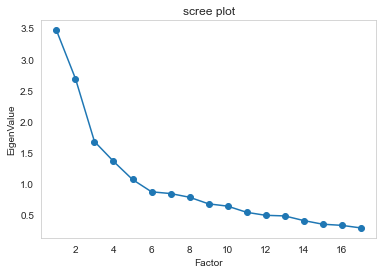

In [25]:
#do a scree plot to find out the best number of Factors ( chose the number of factor above 1 EigenValue, here it's 6)
xvals= range(1,df1.shape[1]+1)
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title('scree plot')
plt.xlabel('Factor')
plt.ylabel('EigenValue')
plt.grid()
plt.show()

In [26]:
# Run Factor Analyzer with the parameteres ( best number of Factors from screen plot, rotation varimax)
fa=FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(df1)
loadings=fa.loadings_
ev, v= fa.get_eigenvalues()

In [27]:
#check loadings, then we can induct the factors
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5
0,-0.102216,0.137265,-0.312371,-0.297721,0.231802,-0.064734
1,-0.038720,0.041115,0.602860,0.049506,0.043835,0.220420
2,-0.043117,0.164204,0.388537,-0.071279,0.425506,0.157719
3,0.064937,-0.197778,0.792381,0.167570,0.189992,0.004275
4,-0.360083,0.083611,-0.168534,-0.090618,-0.088454,-0.338828
5,-0.171116,0.059141,-0.086739,-0.535217,0.148560,0.108631
6,-0.062909,0.075540,0.078560,0.905899,0.073313,0.179621
7,-0.065058,-0.096405,0.002116,0.090209,-0.480302,-0.009285
8,-0.283908,-0.011419,-0.250410,-0.082625,-0.487880,-0.067925
9,0.272693,-0.206798,0.269356,0.007649,0.079068,0.683189


In [28]:
df.info()
#factor 1(product_rating) = 10,11,16
#factor 2(other_rating) = 12,13,14,15
#factor 3(personal_status)= 0,1,2,3
#factor 4(visit_info) = 5,6
#factor 5(other_info) = 7,8
#factor 6(visit_frequency) = 4,9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           113 non-null    int64
 1   Age              113 non-null    int64
 2   Work_Status      113 non-null    int64
 3   Annual_Income    113 non-null    int64
 4   Visit            113 non-null    int64
 5   Visit_Type       113 non-null    int64
 6   Visit_Duration   113 non-null    int64
 7   Distance         113 non-null    int64
 8   MemberShip       113 non-null    int64
 9   Spending         113 non-null    int64
 10  Product_Rating   113 non-null    int64
 11  Price_Rating     113 non-null    int64
 12  Promo_Rating     113 non-null    int64
 13  Ambiance_Rating  113 non-null    int64
 14  Wifi_Rating      113 non-null    int64
 15  Service_Rating   113 non-null    int64
 16  Hangout_Rating   113 non-null    int64
 17  Loyalty          113 non-null    int64
dtypes: int64(1

In [29]:
# Now replace the old number of columns with Factors, that way we reduce the number of column/dimensionality of dataset)
new_variables = fa.fit_transform(df1)
new_df = pd.DataFrame.from_records(new_variables)
new_df

,0,1,2,3,4,5
0,0.254252,0.634034,-0.904256,0.627017,0.617662,-0.830710
1,0.016342,0.690422,-0.616184,-0.756451,0.380608,-0.674555
2,0.170797,0.379473,-0.318364,0.621346,-0.090403,-0.320843
3,-1.566365,-0.357041,-0.527478,-0.694292,-0.781763,-0.211012
4,-0.735010,-0.980425,-0.690421,0.274773,-0.630885,1.238301
...,...,...,...,...,...,...
108,-0.671249,0.250440,0.813204,1.374702,0.011841,1.120921
109,1.488394,1.515727,-0.415352,1.296321,0.190165,1.824342
110,-0.652913,-0.391242,-0.555370,0.693777,-0.935153,-0.276731
111,0.028851,0.552115,-0.590314,-0.769460,0.372160,-0.171931


In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       113 non-null    float64
 1   1       113 non-null    float64
 2   2       113 non-null    float64
 3   3       113 non-null    float64
 4   4       113 non-null    float64
 5   5       113 non-null    float64
dtypes: float64(6)
memory usage: 5.4 KB


In [31]:
new_df.head()

,0,1,2,3,4,5
0,0.254252,0.634034,-0.904256,0.627017,0.617662,-0.830710
1,0.016342,0.690422,-0.616184,-0.756451,0.380608,-0.674555
2,0.170797,0.379473,-0.318364,0.621346,-0.090403,-0.320843
3,-1.566365,-0.357041,-0.527478,-0.694292,-0.781763,-0.211012
4,-0.735010,-0.980425,-0.690421,0.274773,-0.630885,1.238301


In [32]:
new_column_names = ['product_rating', 'others_rating', 'personal_status', 'visit_info', 'other_info', 'visit_frequency']
new_df = new_df.rename(columns=dict(zip(new_df.columns, new_column_names)))
new_df

#factor 1(product_rating) = 10,11,16
#factor 2(others_rating) = 12,13,14,15
#factor 3(personal_status)= 0,1,2,3
#factor 4(visit_info) = 5,6
#factor 5(other_info) = 7,8
#factor 6(visit_frequency) = 4,9

,product_rating,others_rating,personal_status,visit_info,other_info,visit_frequency
0,0.254252,0.634034,-0.904256,0.627017,0.617662,-0.830710
1,0.016342,0.690422,-0.616184,-0.756451,0.380608,-0.674555
2,0.170797,0.379473,-0.318364,0.621346,-0.090403,-0.320843
3,-1.566365,-0.357041,-0.527478,-0.694292,-0.781763,-0.211012
4,-0.735010,-0.980425,-0.690421,0.274773,-0.630885,1.238301
...,...,...,...,...,...,...
108,-0.671249,0.250440,0.813204,1.374702,0.011841,1.120921
109,1.488394,1.515727,-0.415352,1.296321,0.190165,1.824342
110,-0.652913,-0.391242,-0.555370,0.693777,-0.935153,-0.276731
111,0.028851,0.552115,-0.590314,-0.769460,0.372160,-0.171931


# Step 3 Logistic Regression
In this step, we use the Logistic Regression(LR), and the reason we choose LR is because LR is a statistical method used to analyze and model the relationship between a dependent variable and one or more independent variables.In particular, it is used for binary classification problems, where the dependent variable takes one of two possible values. 

In [33]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sn

In [34]:
# Add the Loyalty column back
new_df['Loyalty'] = df['Loyalty']
new_df

,product_rating,others_rating,personal_status,visit_info,other_info,visit_frequency,Loyalty
0,0.254252,0.634034,-0.904256,0.627017,0.617662,-0.830710,0
1,0.016342,0.690422,-0.616184,-0.756451,0.380608,-0.674555,0
2,0.170797,0.379473,-0.318364,0.621346,-0.090403,-0.320843,0
3,-1.566365,-0.357041,-0.527478,-0.694292,-0.781763,-0.211012,1
4,-0.735010,-0.980425,-0.690421,0.274773,-0.630885,1.238301,0
...,...,...,...,...,...,...,...
108,-0.671249,0.250440,0.813204,1.374702,0.011841,1.120921,0
109,1.488394,1.515727,-0.415352,1.296321,0.190165,1.824342,0
110,-0.652913,-0.391242,-0.555370,0.693777,-0.935153,-0.276731,1
111,0.028851,0.552115,-0.590314,-0.769460,0.372160,-0.171931,0


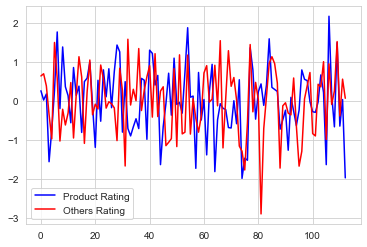

In [35]:
#visually inspect the relationships 
#between them and identify potential patterns or trends that could be useful for building a Logistic Regression model

x1 = new_df['product_rating']
x2 = new_df['others_rating']


plt.plot(x1, label='Product Rating', color='blue')
plt.plot(x2, label='Others Rating', color='red')


plt.legend()
plt.show()

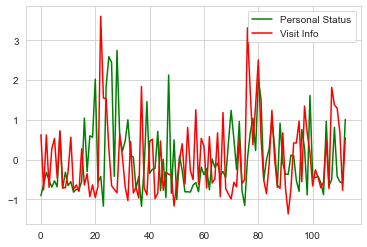

In [36]:
x3 = new_df['personal_status']
x4 = new_df['visit_info']

# Plot lines with labels and colors
plt.plot(x3, label='Personal Status', color='green')
plt.plot(x4, label='Visit Info', color='red')

# Add legend and show plot
plt.legend()
plt.show()

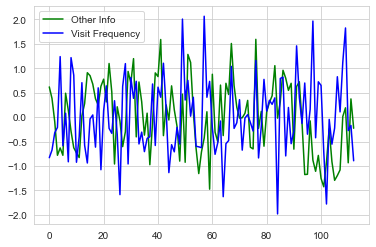

In [37]:
x5 = new_df['other_info']
x6 = new_df['visit_frequency']

plt.plot(x5, label='Other Info', color='green')
plt.plot(x6, label='Visit Frequency', color='blue')

plt.legend()
plt.show()

In [38]:
# dividing the dataset into dependent and independent variable
x = new_df.iloc[:, :-1]  #Select all the columns become x 
y = new_df.iloc[:, 6]    #Select the last column become predict y

In [39]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Loyalty, dtype: int64

In [40]:
x.head()

,product_rating,others_rating,personal_status,visit_info,other_info,visit_frequency
0,0.254252,0.634034,-0.904256,0.627017,0.617662,-0.830710
1,0.016342,0.690422,-0.616184,-0.756451,0.380608,-0.674555
2,0.170797,0.379473,-0.318364,0.621346,-0.090403,-0.320843
3,-1.566365,-0.357041,-0.527478,-0.694292,-0.781763,-0.211012
4,-0.735010,-0.980425,-0.690421,0.274773,-0.630885,1.238301


In [41]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [42]:
# Fitting Logistic Regression to the Training set
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

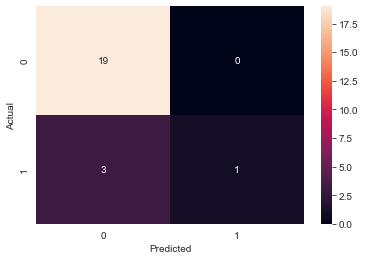

In [43]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

19 true negative predictions: The first 19 observations are zeros predicted correctly.
3 false negative predictions: These are the 3 wrongly predicted as zeros.
no false positive prediction: there are no ones wrongly predicted as one.
1 true positive predictions: The last 1 observations are ones predicted correctly.

In [44]:
# show the Accuracy of the model
train = logistic_regression.score(X_train,y_train)

print('Train Accuracy: ',train)
print('Test Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Train Accuracy:  0.8888888888888888
Test Accuracy:  0.8695652173913043


the train accuracy is 0.88 and the test accuracy is 0.86, it means that the model is performing well on the training data but slightly worse on the test data.

The train accuracy of 0.88 means that the model is able to predict the correct output on 88% of the data points in the training dataset. The test accuracy of 0.86 means that the model is able to predict the correct output on 86% of the data points in the test dataset.

In [45]:
print(X_test) #test dataset (without the actual outcome)
print("************************************************")
print (y_pred) #predicted values

     product_rating  others_rating  personal_status  visit_info  other_info  \
105       -1.641811      -0.995105         0.965442    0.485666   -1.294048   
10         0.127429      -0.316312        -0.651155   -0.295959   -0.731911   
24         0.099706      -0.190852         1.841407    1.530260   -0.959758   
7         -0.202833      -1.035846         0.698102    0.726533    0.139463   
108       -0.671249       0.250440         0.813204    1.374702    0.011841   
56         0.117642       0.050517        -0.638505   -0.500155   -0.710789   
63         0.932350       0.040341         0.017716   -0.585391    0.655353   
76        -1.528463      -0.572784         0.020103    3.310130    1.591797   
26        -0.180531      -0.080661         2.439486   -0.651533   -0.080335   
2          0.170797       0.379473        -0.318364    0.621346   -0.090403   
91        -1.272115      -0.319939        -0.365075   -1.362107    0.626322   
45        -0.664505       0.356449         0.008402 

In [46]:
print('Intercept: \n', logistic_regression.intercept_)
print('Coefficients: \n', logistic_regression.coef_)

Intercept: 
 [-1.99136935]
Coefficients: 
 [[-1.49314203  0.14584462 -0.21231239  0.19127868 -0.71198289 -1.28224515]]


The intercept in this logistic regression model is -1.99, it means that when all the independent variable are equal to 0, the log-odds(the probability of the event occuring divided by the probability of the event not occuring) will be -1.99

In [47]:
import statsmodels.api as sm
X= sm.add_constant(x)
logit_model = sm.Logit(y, X).fit()
print (logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.275954
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Loyalty   No. Observations:                  113
Model:                          Logit   Df Residuals:                      106
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.4538
Time:                        14:26:23   Log-Likelihood:                -31.183
converged:                       True   LL-Null:                       -57.096
Covariance Type:            nonrobust   LLR p-value:                 2.022e-09
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.8857      0.582     -4.955      0.000      -4.027      -1.744
product_rating

In this model, we can see that the variables "product_rating", "visit_info", and "visit_frequency" have significant coefficients (p-values less than 0.05), indicating that they are likely to be important predictors of the outcome variable "Loyalty". "Others_rating" and "personal_status" have non-significant coefficients, meaning that they are not statistically significantly related to "Loyalty". "Other_info" has a borderline significant coefficient (p-value = 0.090), suggesting that it may be a weak predictor of "Loyalty".

The logistic regression model as a whole appears to be significant, as indicated by the likelihood ratio test (LLR p-value = 2.022e-09), which compares the fit of the full model to the fit of a null model that includes only the intercept. The pseudo R-squared value of 0.4538 suggests that the model explains a moderate amount of the variation in the outcome variable.

Precision:  1.0
Recall:  0.25
F1-score:  0.4


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


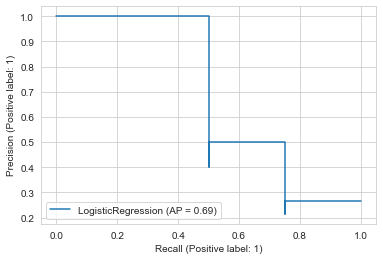

In [48]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import f1_score


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print("F1-score: ",format(f1))


#Plotting Precision-Recall Curve
disp = plot_precision_recall_curve(logistic_regression, X_test, y_test)

Precision is the ratio between the True Positives and all the points that are classified as Positives.
Recall is the measure of our model correctly identifying True Positives. It is also called a True positive rate.
F1-score is the Harmonic mean of the Precision and Recall
F1-score is a better metric when there are imbalanced classes. It is needed when you want to seek a balance between Precision and Recall.

In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model.

Precision: 1.0 means that all the positive predictions made by the model are correct. In other words, out of all the samples that the model predicted as positive, 100% of them are actually positive.

Recall: 0.25 means that only 25% of the actual positive samples were correctly predicted by the model. In other words, out of all the positive samples in the dataset, the model only correctly predicted 25% of them.

F1-score: 0.4 is the harmonic mean of precision and recall. It is a metric that takes both precision and recall into account, and is useful when both metrics are important. A higher F1-score indicates better overall performance of the model.

Overall, we can see that the model has high precision but low recall. This means that the model is good at correctly identifying positive samples, but it misses a lot of positive samples. The F1-score of 0.4 indicates that the model's overall performance is not very good, and there is room for improvement.

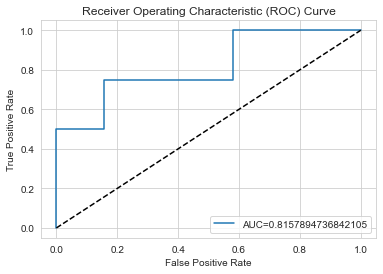

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# y_test and y_pred are the test and predicted labels, respectively
# of the binary classification problem
y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]  #provide a more accurate representation of the model's condifence in its prediction
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label="AUC=" + str(auc))
# diagonal line (This line represents the ROC curve of a random classifier that 
#has no predictive power and serves as a baseline for the model's performance.)
plt.plot([0, 1], [0, 1], 'k--')  

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=4)
plt.show()

ROC curves make it easy to identify the best threhold for making a decision
AUC can help you decide which categorization method is better(A higher AUC score indicates a better performance of the classifier)

This means that the model has perfect precision, which means that when it makes a positive prediction, it is correct 100% of the time. However, the recall is low, which means that the model is only identifying 25% of the positive cases. This is not ideal, as it means that the model is missing a large number of positive cases.

The F1-score is a balance between precision and recall, and in this case, it is 0.4, which is a relatively low value. This means that the model is not doing a great job at both identifying all the positive cases (recall) and making sure the positive cases it identifies are correct (precision).

The AUC score is 0.81, which is a good value, indicating that the model is able to distinguish between positive and negative cases quite well.

Overall, the model's performance is not ideal, as it has a low recall and F1-score, but it is still able to distinguish between positive and negative cases quite well, as indicated by the high AUC score. Depending on the specific use case, this may or may not be acceptable, and further analysis may be needed to determine the best course of action.

# **Classification - Random Forest** 

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
df

,Gender,Age,Work_Status,Annual_Income,Visit,Visit_Type,Visit_Duration,Distance,MemberShip,Spending,Product_Rating,Price_Rating,Promo_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Hangout_Rating,Loyalty
0,1,1,0,0,3,0,1,0,0,1,4,3,5,5,4,4,3,0
1,1,1,0,0,3,2,0,1,0,1,4,3,4,4,4,5,2,0
2,0,1,2,0,2,0,1,2,0,1,4,3,4,4,4,4,3,0
3,1,1,0,0,3,2,0,2,1,1,2,1,4,3,3,3,3,1
4,0,1,0,0,2,2,1,1,1,2,3,3,4,2,2,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0,3,1,1,2,0,2,1,0,2,3,3,5,3,2,4,4,0
109,0,1,2,0,2,0,2,1,0,3,5,5,5,5,5,5,5,0
110,0,1,0,0,3,0,1,1,1,1,3,2,4,3,3,3,4,1
111,1,1,2,0,3,2,0,0,1,1,4,4,4,4,4,4,4,0


In [52]:
# Let's see how many values are divided into good or bad
sizes = df['Loyalty'].value_counts(sort=1)
print(sizes)

0    90
1    23
Name: Loyalty, dtype: int64


In [53]:
#dividing the dataset into dependent and independent variable
xrf = df.iloc[:, :-1]
yrf = df.iloc[:, 17]

In [54]:
yrf.head()

0    0
1    0
2    0
3    1
4    0
Name: Loyalty, dtype: int64

In [55]:
xrf.head()

,Gender,Age,Work_Status,Annual_Income,Visit,Visit_Type,Visit_Duration,Distance,MemberShip,Spending,Product_Rating,Price_Rating,Promo_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Hangout_Rating
0,1,1,0,0,3,0,1,0,0,1,4,3,5,5,4,4,3
1,1,1,0,0,3,2,0,1,0,1,4,3,4,4,4,5,2
2,0,1,2,0,2,0,1,2,0,1,4,3,4,4,4,4,3
3,1,1,0,0,3,2,0,2,1,1,2,1,4,3,3,3,3
4,0,1,0,0,2,2,1,1,1,2,3,3,4,2,2,3,3


In [56]:
# Splitting the dataset into the Training set and Test set
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(xrf, yrf, test_size = 0.2, random_state = 20)
#test_size = 0.4 means 40% of our data randomly selected and assign for testing purpose
#same random_state value consistently in your code to ensure reproducibility

In [57]:
#Apply random forest
#(n_estimators=10, builds 10 decision trees and combines their predictions to form the final output
#if the estimator are too small will be underfitting(easy model and no capture more feature)
#and too big will be overfitting (too complex and start fits the noisy)
rfc = RandomForestClassifier(n_estimators=15, random_state=20)

In [58]:
#rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(Xrf_train, yrf_train)
yrf_pred = rfc.predict(Xrf_test)

print(Xrf_test) #test dataset (without the actual outcome)
print("************************************************")
print(yrf_pred) #predicted values

     Gender  Age  Work_Status  Annual_Income  Visit  Visit_Type  \
55        0    0            0              0      2           0   
51        1    1            2              1      3           2   
1         1    1            0              0      3           2   
88        0    1            2              2      2           2   
47        0    3            2              3      3           0   
49        1    3            3              0      2           2   
108       0    3            1              1      2           0   
5         1    1            0              0      3           0   
2         0    1            2              0      2           0   
101       0    1            0              0      3           0   
39        0    2            2              2      3           2   
93        0    2            2              0      3           1   
78        0    2            1              2      1           2   
102       0    1            0              0      3           

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

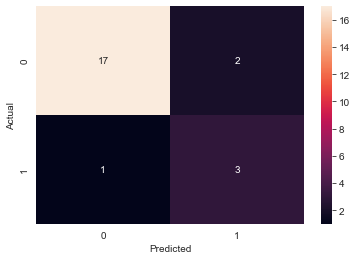

In [59]:
Yrf_pred = yrf_pred
confusion_matrix = pd.crosstab(yrf_test, Yrf_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
#confusion_matrix

In [60]:
#find our prediction accuracy
# show the Accuracy of the model
train_RF = rfc.score(Xrf_train,yrf_train)
test_RF =metrics.accuracy_score(yrf_test, yrf_pred)

print('Train Accuracy: ',train_RF )
print('Test Accuracy: ',test_RF)

#find what parameters or features occurs in our model
features_list = list(xrf.columns)
feature_imp = pd.Series(rfc.feature_importances_, index=features_list).sort_values(ascending=False) 
print(feature_imp)

Train Accuracy:  1.0
Test Accuracy:  0.8695652173913043
Price_Rating       0.185618
Hangout_Rating     0.177282
Visit_Duration     0.085480
Product_Rating     0.071588
Ambiance_Rating    0.064951
MemberShip         0.061136
Spending           0.053376
Promo_Rating       0.047777
Service_Rating     0.046355
Visit              0.036898
Work_Status        0.036837
Visit_Type         0.029327
Wifi_Rating        0.027942
Distance           0.027423
Gender             0.019993
Annual_Income      0.019415
Age                0.008602
dtype: float64


In [61]:
from sklearn.tree import export_text

In [62]:
# assume `rfc` is your trained RandomForestClassifier model
tree_text = export_text(rfc.estimators_[1], feature_names=Xrf_train.columns.tolist())
print(tree_text)
# 0: yes 
# 1: no loyalty

#gender: 0-Male, 1-Female
#age : 0 Below 20, 1 From 20 to 29, 2 From 30 to 39 , 3 40 and above
#work_status : 0 Student 1 Self-Employed 2 Employed 3 Housewife
#Annual_income: 0 Less than RM25,000 1 RM25,000 – RM50,000 2 RM50,000 – RM100,000 3 RM100,000 – RM150,000 4 More than RM150,000
#Visit:0 - Daily 1 - Weekly 3 - Monthly 4 - Never
#Visit_type : 0 Dine In 1 Drive-thru 2 Take away 3 Never 4 Others
#Visit Duration: 0 Below 30 mins 1 30 mins to 1h 2 1h to 2h 3 2h to 3 h 4 More than 3h
#Distance : 0 Within 1km 1 1km to 3km 2 More than 3km
#Membership :0 Yes 1 No
#Spending :0 Zero 1 Less than RM20 2 RM 20 to RM40 3 More than RM40
#product_rating:Scaled 1-5 1 Very Bad 5 Excellent
#price_rating:Scaled 1-5 1 Very Bad 5 Excellent
#promo_rating:Scaled 1-5 1 Very Bad 5 Excellent
#ambiance_rating:Scaled 1-5 1 Very Bad 5 Excellent
#wifi_rating:Scaled 1-5 1 Very Bad 5 Excellent
#service_rating:Scaled 1-5 1 Very Bad 5 Excellent
#hangout_rating:Scaled 1-5 1 Very Bad 5 Excellent

|--- Hangout_Rating <= 2.50
|   |--- MemberShip <= 0.50
|   |   |--- Service_Rating <= 4.50
|   |   |   |--- class: 0.0
|   |   |--- Service_Rating >  4.50
|   |   |   |--- class: 1.0
|   |--- MemberShip >  0.50
|   |   |--- Visit_Type <= 1.50
|   |   |   |--- class: 1.0
|   |   |--- Visit_Type >  1.50
|   |   |   |--- Work_Status <= 1.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- Work_Status >  1.00
|   |   |   |   |--- class: 0.0
|--- Hangout_Rating >  2.50
|   |--- Price_Rating <= 2.50
|   |   |--- Visit <= 2.50
|   |   |   |--- class: 0.0
|   |   |--- Visit >  2.50
|   |   |   |--- Spending <= 0.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- Spending >  0.50
|   |   |   |   |--- Visit_Type <= 0.50
|   |   |   |   |   |--- Annual_Income <= 0.50
|   |   |   |   |   |   |--- Hangout_Rating <= 3.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Hangout_Rating >  3.50
|   |   |   |   |   |   |   |--- Visit_Duration <= 0.50
|   |   |   |   |   |   |  

Precision_RF:  0.6
Recall_RF:  0.75
F1-score:  0.6666666666666665


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


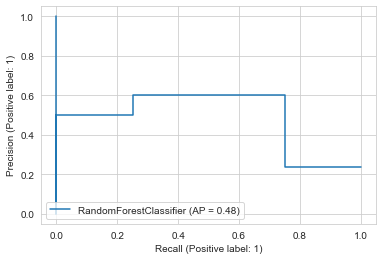

In [63]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_precision_recall_curve

precision_rf = precision_score(yrf_test, yrf_pred)
recall_rf = recall_score(yrf_test, yrf_pred)
f1_rf = f1_score(yrf_test, yrf_pred)

print('Precision_RF: ',precision_rf)
print('Recall_RF: ',recall_rf)
print("F1-score: ",format(f1_rf))


#Plotting Precision-Recall Curve
disp_rf = plot_precision_recall_curve(rfc, Xrf_test, yrf_test)

the precision score for the Random Forest model is 0.6, which means that 60% of the predicted positives were actually true positives. The recall score is 0.75, which means that 75% of the actual positives were correctly identified by the model. The F1-score is 0.6667, which is the harmonic mean of precision and recall.

Overall, the scores indicate that the model has a moderate level of performance. The precision score is relatively low, which means that the model has a higher rate of false positives. The recall score is better, indicating a lower rate of false negatives. The F1-score is in the middle, suggesting that the model has a good balance of precision and recall.

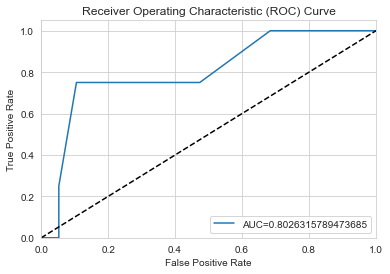

In [64]:
# y_test and y_pred are the test and predicted labels, respectively
# of the binary classification problem
yrf_pred_proba = rfc.predict_proba(Xrf_test)[::,1]  #provide a more accurate representation of the model's condifence in its prediction
fprrf, tprrf, _ = metrics.roc_curve(yrf_test, yrf_pred_proba)
aucrf = metrics.roc_auc_score(yrf_test,yrf_pred_proba)

# plot the ROC curve
plt.plot(fprrf, tprrf,label="AUC=" + str(aucrf))
# diagonal line (This line represents the ROC curve of a random classifier that 
#has no predictive power and serves as a baseline for the model's performance.)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=4)
plt.show()

An AUC (Area Under the Curve) value of 0.80 indicates that the model has a good ability to distinguish between positive and negative classes. A perfect model would have an AUC of 1, while a random model would have an AUC of 0.5. Therefore, an AUC of 0.80 indicates that the model is performing reasonably well in distinguishing between the two classes.

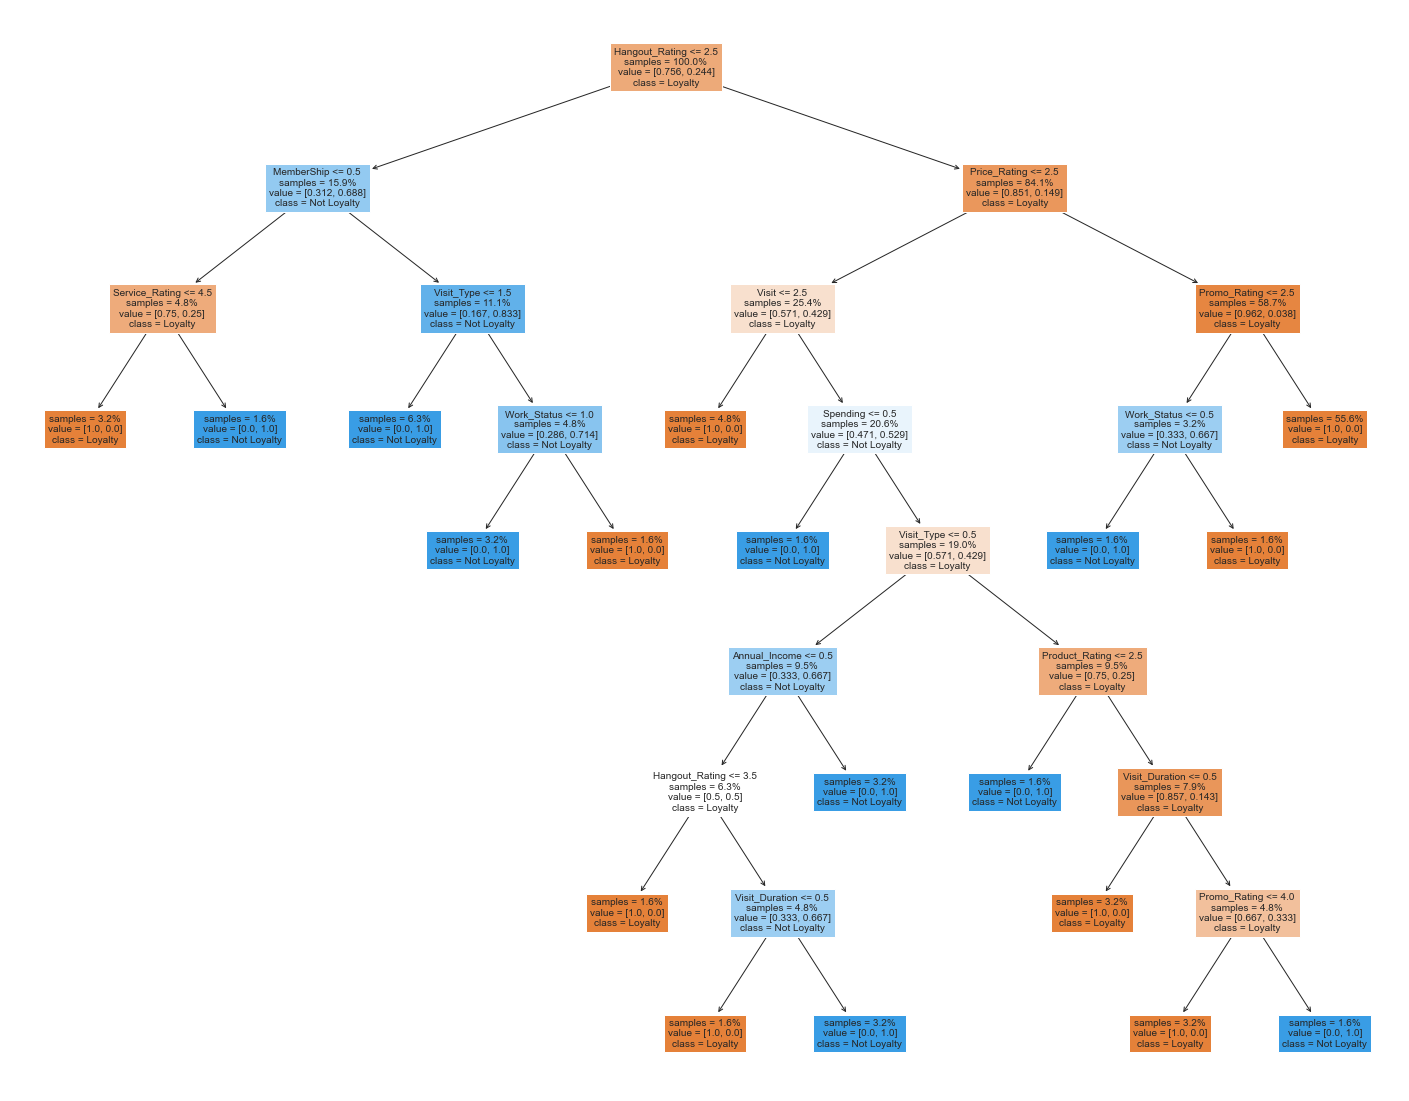

In [67]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# extract a single decision tree from the random forest
dt = rfc.estimators_[1]

# plot the decision tree
fig = plt.figure(figsize=(25,20))
plot_tree(dt,
          feature_names=df.columns,
          class_names=['Loyalty', 'Not Loyalty'], 
          impurity=False,
          proportion=True,
          filled=True,
          fontsize=10)
fig.savefig('test.png')